In [2]:
import neuron
import numpy as np
from neuron import h, gui
import matplotlib.pyplot as plt
from tqdm import tqdm

import pickle
import pandas as pd
from scipy.signal import find_peaks

working_dir = 'K:\\Users\\adamimos\Documents\\Projects\\Godenzini\\PublicSubmission'
import pandas as pd
import glob

In [ ]:
# Run this if you want to make sure we are finding data
glob.glob(working_dir+"\\batch_results*tuft*.p*")

# Load Multicompartmental Data for Changing number of tuft synapses

In [5]:
# load resuls
tuft_syn_results = []
for i in glob.glob(working_dir+"\\b*tuft*.p"):
    tuft_syn_results = tuft_syn_results+pickle.load(open(i,"rb"))

    

# Load Multicompartmental Data for Changing number of basal synapses

In [6]:
# load resuls
basal_syn_results = []
for i in glob.glob(working_dir+"\\batch_results*basal*.p*"):
    basal_syn_results = basal_syn_results+pickle.load(open(i,"rb"))


In [7]:
# load results
# print('the number of trials is', len(basal_syn_results), '\nthe keys are', basal_syn_results[-1].keys())
print('the number of trials is', len(tuft_syn_results), '\nthe keys are', tuft_syn_results[-1].keys())

the number of trials is 140 
the keys are dict_keys(['time', 'soma_v', 'nBackgroundSyns', 'nBasalSyns', 'nCSplusTuftSyns', 'is_APV'])


# Plot an example trace just to look at the data

[[<matplotlib.lines.Line2D at 0x2b65f1a9700>],

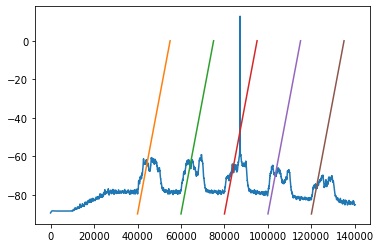

In [8]:
# what does a trace look like?
plt.plot(tuft_syn_results[1000]['soma_v'])
timespans = [[40000,55000],[60000,75000],[80000,95000],[100000,115000],[120000,135000]]
[plt.plot(i,[-90,0]) for i in timespans]

# Analyze the Multicompartmental Data

In [10]:
# This function extracts the spike rate from the data
def get_spike_rate(batch_results,tuft=True):

    # arrange the number of synapses and the voltage data
    syns = []
    volt = []
    if tuft:
        for run in batch_results:
            if 'nCSplusTuftSyns' in run:
                syns.append(run['nCSplusTuftSyns'])
                volt.append(run['soma_v'])
    else:
        for run in batch_results:
            if 'nCSplusTuftSyns' in run:
                syns.append(run['nBasalSyns'])
                volt.append(run['soma_v'])
                
    # get the number of spikes per simulation
    spik = []
    syns2 = []
    for i, s in enumerate(syns):
        for t in timespans:
            
            spik.append(2*len(find_peaks(volt[i][t[0]:t[1]],height=0)[0]))
            syns2.append(syns[i])
    return syns2,spik

In [11]:
# get the spike rates
nTuft, tuftRate = get_spike_rate(tuft_syn_results,True)
nBasal, basalRate = get_spike_rate(basal_syn_results,False)


In [12]:
# arange the data
import scipy
basal_mean, basal_var, basal_std = [], [], []
for n in np.unique(nBasal):
    basal_mean.append(np.mean(np.array(basalRate)[np.where(nBasal==n)[0]]))
    basal_var.append(scipy.stats.sem(np.array(basalRate)[np.where(nBasal==n)[0]]))
    basal_std.append(scipy.stats.tstd(np.array(basalRate)[np.where(nBasal==n)[0]]))
tuft_mean, tuft_var, tuft_std = [], [], []
for n in np.unique(nTuft):
    tuft_mean.append(np.mean(np.array(tuftRate)[np.where(nTuft==n)[0]]))
    tuft_var.append(scipy.stats.sem(np.array(tuftRate)[np.where(nTuft==n)[0]]))
    tuft_std.append(scipy.stats.tstd(np.array(tuftRate)[np.where(nTuft==n)[0]]))

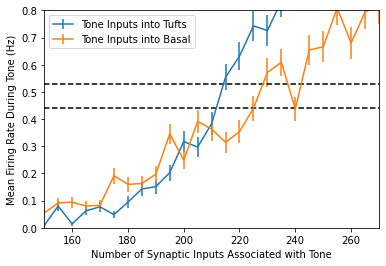

In [36]:
# plot the data
plt.errorbar(np.unique(nTuft),tuft_mean,tuft_var,label='Tone Inputs into Tufts')
plt.errorbar(np.unique(nBasal),basal_mean,basal_var,label='Tone Inputs into Basal')
plt.plot([150,300],[0.44,0.44],'k--')
plt.plot([150,300],[0.53,0.53],'k--')
plt.legend()
plt.ylabel('Mean Firing Rate During Tone (Hz)')
plt.xlabel('Number of Synaptic Inputs Associated with Tone')
plt.xlim([150,270])
plt.ylim([0.0,.8])
#plt.savefig('synapses_into_tuft_and_basal_AP_output.pdf')


(0.0, 0.8)

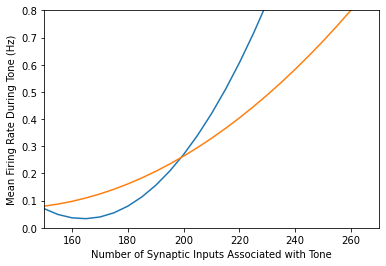

In [37]:
# fit data to a 3rd order polynomial
plt.ylabel('Mean Firing Rate During Tone (Hz)')
plt.xlabel('Number of Synaptic Inputs Associated with Tone')
poly1 = np.polyfit(np.unique(nTuft),tuft_mean,2)
x = np.unique(nTuft)
plt.plot(np.unique(nTuft),np.polyval(poly1,x))

poly2 = np.polyfit(np.unique(nTuft),basal_mean,2)
x = np.unique(nTuft)
plt.plot(np.unique(nTuft),np.polyval(poly2,x))

plt.xlim([150,270])
plt.ylim([0.0,.8])

# Example traces

In [3]:
# load resuls
tuft_syn_results = []
for i in glob.glob(working_dir+"\\b*res*tuft*examp*.p"):
    tuft_syn_results = tuft_syn_results+pickle.load(open(i,"rb"))

In [4]:
basal_syn_results = []
for i in glob.glob(working_dir+"\\b*basal*examp*.p"):
    basal_syn_results = basal_syn_results+pickle.load(open(i,"rb"))

In [5]:
time = np.array(tuft_syn_results[11]['time'])

IndexError: list index out of range

In [60]:
soma_v = np.array(tuft_syn_results[0]['soma_v'])

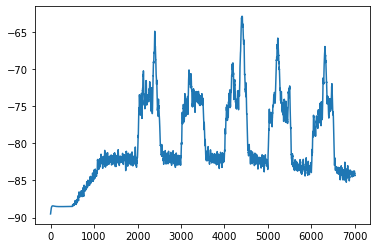

In [61]:
plt.plot(time,soma_v)

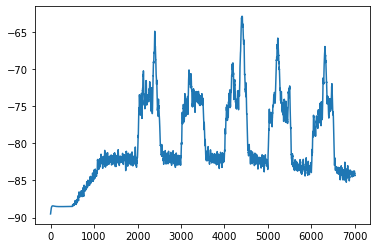

In [62]:
for i in range(0,1):
    time = np.array(tuft_syn_results[i]['time'])
    soma_v = np.array(tuft_syn_results[i]['soma_v'])
    plt.plot(time,soma_v)
    

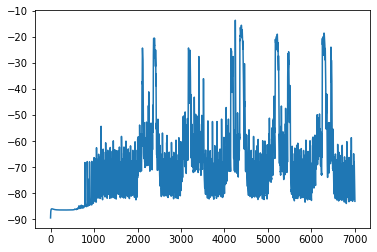

In [63]:
for i in range(0,1):
    time = np.array(tuft_syn_results[i]['time'])
    dend_v = np.array(tuft_syn_results[i]['apic_v'])
    plt.plot(time,dend_v[:,[2]])

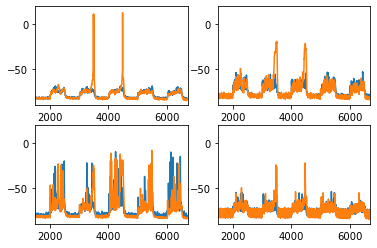

In [64]:
i = 2
j = 6
plt.subplot(2,2,1)
time = np.array(basal_syn_results[i]['time'])
soma_v = np.array(basal_syn_results[i]['soma_v'])
plt.plot(time,soma_v); plt.xlim([1500,6700]); plt.ylim([-90,20])
time = np.array(tuft_syn_results[j]['time'])
soma_v = np.array(tuft_syn_results[j]['soma_v'])
plt.plot(time,soma_v); plt.xlim([1500,6700]); plt.ylim([-90,20])


plt.subplot(2,2,2)
time = np.array(basal_syn_results[i]['time'])
soma_v = np.array(basal_syn_results[i]['apic_v'])
plt.plot(time,soma_v[:,2]); plt.xlim([1500,6700]); plt.ylim([-90,20])
time = np.array(tuft_syn_results[j]['time'])
soma_v = np.array(tuft_syn_results[j]['apic_v'])
plt.plot(time,soma_v[:,2]); plt.xlim([1500,6700]); plt.ylim([-90,20])
plt.subplot(2,2,2)


plt.subplot(2,2,3)
time = np.array(basal_syn_results[i]['time'])
soma_v = np.array(basal_syn_results[i]['apic_v'])
plt.plot(time,soma_v[:,5]); plt.xlim([1500,6700]); plt.ylim([-90,20])
time = np.array(tuft_syn_results[j]['time'])
soma_v = np.array(tuft_syn_results[j]['apic_v'])
plt.plot(time,soma_v[:,5]); plt.xlim([1500,6700]); plt.ylim([-90,20])


plt.subplot(2,2,4)
time = np.array(basal_syn_results[i]['time'])
soma_v = np.array(basal_syn_results[i]['basal_v'])
plt.plot(time,soma_v[:,0]); plt.xlim([1500,6700]); plt.ylim([-90,20])
time = np.array(tuft_syn_results[j]['time'])
soma_v = np.array(tuft_syn_results[j]['basal_v'])
plt.plot(time,soma_v[:,0]); plt.xlim([1500, 6700]); plt.ylim([-90,20])
plt.savefig('tuftinputsex.pdf')

IndexError: list index out of range

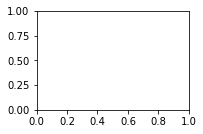

In [65]:
plt.subplot(2,2,1)
time = np.array(basal_syn_results[21]['time'])
soma_v = np.array(basal_syn_results[21]['soma_v'])
plt.plot(time,soma_v); plt.xlim([1800,2700]); plt.ylim([-90,20])

plt.subplot(2,2,2)
time = np.array(basal_syn_results[21]['time'])
soma_v = np.array(basal_syn_results[21]['apic_v'])
plt.plot(time,soma_v[:,2]); plt.xlim([1800,2700]); plt.ylim([-90,20])

plt.subplot(2,2,3)
time = np.array(basal_syn_results[21]['time'])
soma_v = np.array(basal_syn_results[21]['apic_v'])
plt.plot(time,soma_v[:,5]); plt.xlim([1800,2700]); plt.ylim([-90,20])

plt.subplot(2,2,4)
time = np.array(basal_syn_results[21]['time'])
soma_v = np.array(basal_syn_results[21]['basal_v'])
plt.plot(time,soma_v[:,0]); plt.xlim([1800,2700]); plt.ylim([-90,20])
plt.savefig('basalinputsex.pdf')

(-90.0, 20.0)

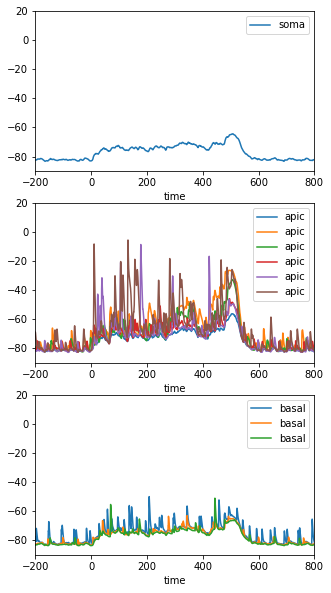

In [66]:
plt.figure(figsize=(5,10))
i = 7
time = np.array(tuft_syn_results[i]['time'])-2000
soma_v = np.array(tuft_syn_results[i]['soma_v'])
dend_v = np.array(tuft_syn_results[i]['apic_v'])
basal_v = np.array(tuft_syn_results[i]['basal_v'])
plt.subplot(3,1,1)
plt.plot(time,soma_v,label='soma')
plt.xlim([-200, 800]); plt.xlabel('time');plt.legend();plt.ylim([-90,20])
plt.subplot(3,1,2)
plt.plot(time,dend_v[:,[0,1,2,3,4,5]],label='apic')
plt.xlim([-200, 800]); plt.xlabel('time');plt.legend();plt.ylim([-90,20])
plt.subplot(3,1,3)
plt.plot(time,basal_v[:,[0,1,2]],label='basal')
plt.xlim([-200, 800]); plt.xlabel('time');plt.legend();plt.ylim([-90,20])

(-90.0, 20.0)

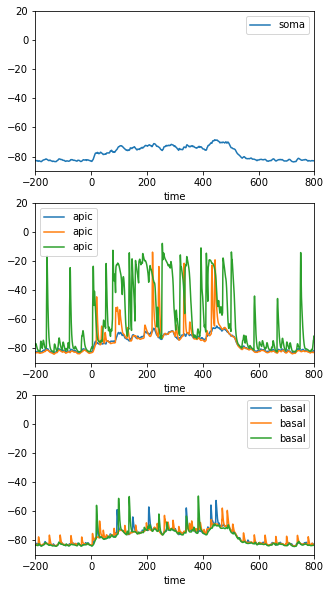

In [67]:
i = 14
plt.figure(figsize=(5,10))

time = np.array(basal_syn_results[i]['time'])-2000
soma_v = np.array(basal_syn_results[i]['soma_v'])
dend_v = np.array(basal_syn_results[i]['apic_v'])
basal_v = np.array(basal_syn_results[i]['basal_v'])
plt.subplot(3,1,1)
plt.plot(time,soma_v,label='soma')
plt.xlim([-200, 800]); plt.xlabel('time');plt.legend();plt.ylim([-90,20])
plt.subplot(3,1,2)
plt.plot(time,dend_v[:,[0,4,5]],label='apic')
plt.xlim([-200, 800]); plt.xlabel('time');plt.legend();plt.ylim([-90,20])
plt.subplot(3,1,3)
plt.plot(time,basal_v[:,[0,1,2]],label='basal')
plt.xlim([-200, 800]); plt.xlabel('time');plt.legend();plt.ylim([-90,20])

# background only

In [6]:
# load resuls
background_data = []
for i in glob.glob(working_dir+"\\*background*.p"):
    background_data = background_data+pickle.load(open(i,"rb"))

In [7]:
len(background_data)

10

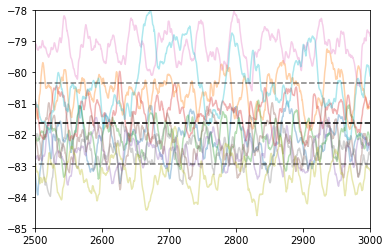

In [8]:
m = np.mean(np.array([np.array(background_data[i]['soma_v'])[-4000:] for i in range(10)]).reshape(-1))
s = np.std(np.array([np.array(background_data[i]['soma_v'])[-4000:] for i in range(10)]).reshape(-1))
for i in range(10):
    plt.plot(background_data[i]['time'],np.array(background_data[i]['soma_v']),alpha=0.35)
    plt.xlim([2500,3000])
    plt.ylim([-85,-78])
plt.plot([0,4000],[m,m],'k--')
plt.plot([0,4000],[m+s,m+s],'k--',alpha=0.5)
plt.plot([0,4000],[m-s,m-s],'k--',alpha=0.5)
plt.savefig('background.pdf')

# Current steps

In [9]:
# load resuls
current_data = []
for i in glob.glob(working_dir+"\\*current*.p"):
    current_data = current_data+pickle.load(open(i,"rb"))

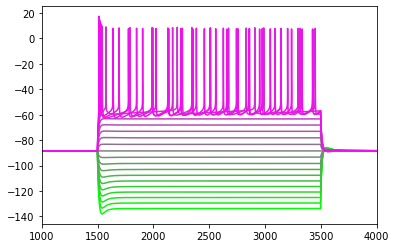

In [75]:
for i in range(20):
    plt.plot(current_data[i]['time'],np.array(current_data[i]['soma_v']),color = [i/20,1-i/20,i/20])
    plt.xlim([1000,4000])

plt.savefig('IClamp_traces.pdf')

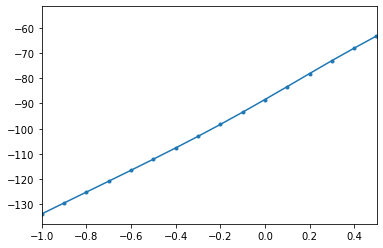

In [77]:

m = [np.mean(np.array(current_data[i]['soma_v'])[40000:50000]) for i in range(30)]
current = np.arange(-1,40,0.1)
plt.plot(current[0:30],m,'.-')
plt.xlim([-1,0.5])

plt.savefig('IVcurve.pdf')

In [78]:
np.polyfit(current[0:30],m,1)

array([ 28.7226054, -92.5703136])

(0.0, 2.25)

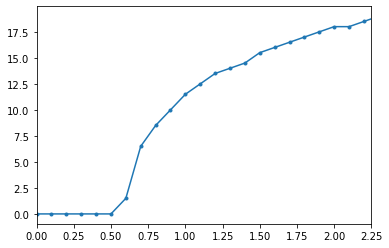

In [82]:

m = [current_data[i]['num_spikes'] for i in range(len(current_data))]
current = np.arange(-1,40,0.1)
plt.plot(current[0:51],np.array(m)/2,'.-')
plt.xlim([0,2.25])
#plt.savefig('fIcurve.pdf')

# Use genetic algorithm to find parameters for reduced algorithm

In [39]:
# The reduced model
def compSig(nSoma, nDend, p):
    try:
        a1 = 87.01/20*p[0];
        a2 = 68.24/20*p[1];
        a3 = 71.71*p[2];
        a4 = 10.5*3*p[3];
        b1 = 28.5*p[4];
        b2 = 164.7/2*p[5];
        b3 = 64.97/1.5*p[6];
        b4 = -12.63*p[7];
        M = a1 + a2/(1+exp(-(nDend-a3)/a4));
        T = b1 + b2/(1+exp(-(nDend-b3)/b4));
        outFreq = p[8]/10+M/(1+exp(-(nSoma-T)));
    except:
        outFreq = 0.0
    return outFreq



In [40]:
def run_simulation(params,nruns = 50, x = np.arange(150,270,5)):


    def run_single_sim(nBasal, nTuft, params):

        tuft_times = np.random.uniform(0,500,nTuft)
        tuft_counts = np.histogram(tuft_times,np.arange(0,550,50))[0] + params[9]*12

        basal_times = np.random.uniform(0,500,nBasal)
        basal_counts = np.histogram(basal_times,np.arange(0,550,50))[0] + params[10]*12

        # background is 175 synapses uniformly distributed in space
        # and temporally with freq between 20 and 150 hz? for a first pass just give like an extra 50 in each compartment?

        poisson_prob = np.array([compSig(*x,params) for x in list(zip(basal_counts,tuft_counts))])/20 # this number divided by 20 will give the poisson mean
        
        return 2*np.sum(np.random.poisson(poisson_prob)) # give freq

    tuft_out = []
    for t in x:
        tuft_out.append(np.mean([run_single_sim(200, t, params) for rep in range(nruns)]))

    # plt.plot(np.arange(150,300,5),tuft_out, label = 'tuft mean')


    basal_out = []
    for b in x:
        basal_out.append(np.mean([run_single_sim(b, 200, params) for rep in range(nruns)]))

    return np.array(basal_out), np.array(tuft_out)


#################### Params going in ########################
[150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225 230 235
 240 245 250 255 260 265]
LOSS 0.11058131931933013 P [2.70689878 1.85796862 0.00962733 1.04558524 1.68791528 2.88007978
 0.04294178 1.17810031 2.61261058 0.14118742 3.7345926 ] INDS [117 115  10  35  14  56 160]


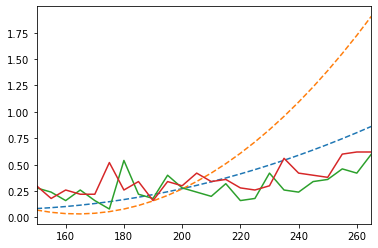

#################### Params going in ########################
[150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225 230 235
 240 245 250 255 260 265]
LOSS 0.08875843513802802 P [0.58797918 2.29807153 0.43204316 1.90312787 1.02798306 2.75855988
 0.83974124 0.36321451 3.69294798 1.31305212 2.3570214 ] INDS [13  0  6 91 16 22  8]


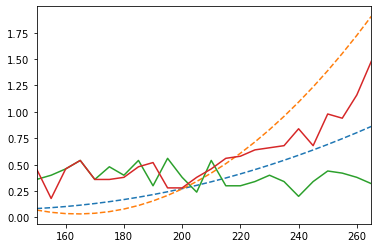

#################### Params going in ########################
[150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225 230 235
 240 245 250 255 260 265]
LOSS 0.02352211182940096 P [2.26463971 2.29807153 1.76999483 2.80321718 0.4118029  2.75855988
 0.83974124 2.84359761 1.95016415 3.75143096 3.74655715] INDS [28 18 69 75 74  0  4]


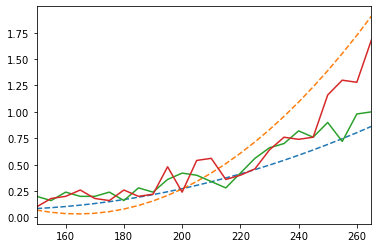

#################### Params going in ########################


KeyboardInterrupt: 

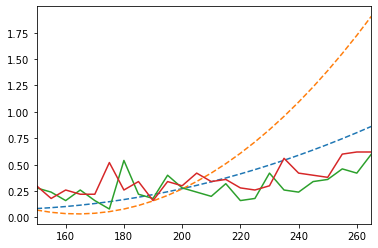

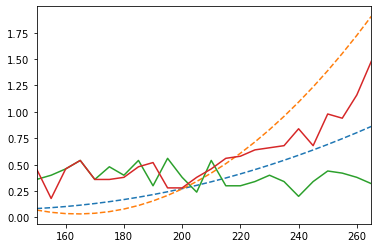

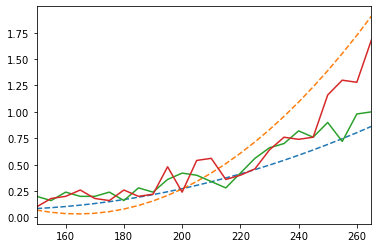

In [42]:
# This actually runs the genetic algorithm

from sklearn.metrics import mean_squared_error
from IPython import display
from time import sleep
from math import exp

def run_round(pop_params,old_loss, x = np.arange(150,270,5)):
    
    poly_tuft = np.array([ 1.84005037e-04, -6.04023854e-02,  4.99047368e+00])
    poly_basal = np.array([ 4.61674588e-05, -1.23941737e-02,  9.04717953e-01])

    tuft_true = np.polyval(poly_tuft,x)
    basal_true = np.polyval(poly_basal,x)

    # create the organisms
    if old_loss< .07:
        n_runs = 100
    if old_loss < .06:
        n_runs = 200
    if old_loss < .05:
        n_runs = 500
    if old_loss >=.07:
        n_runs = 50
    # let them live
    n_runs = 100
    results = [run_simulation(p, n_runs, x) for p in pop_params]

    # compare to wanted results
    # loss = [np.sum(np.abs(basal_true-i[0])) + np.sum(np.abs(tuft_true-i[1])) for i in results]
    loss = [.75*mean_squared_error(basal_true,i[0])+.25*mean_squared_error(tuft_true,i[1]) for i in results]
    #loss = [mean_squared_error(basal_true,i[0]) for i in results]
    # take top 5 performers and 
    plt.figure()
    ind_top_5 = np.argsort(loss)[:7]
    print(x)
    print('LOSS',loss[ind_top_5[0]], 'P', pop_params[ind_top_5[0]], 'INDS', ind_top_5)
    plt.plot(x,basal_true,'--'); plt.plot(x,tuft_true,'--');plt.plot(x,results[ind_top_5[0]][0]);plt.plot(x,results[ind_top_5[0]][1]); plt.xlim(x[0],x[-1])
    old_loss = loss[ind_top_5[0]]
    best_params = pop_params[ind_top_5[0]]
    display.display(plt.gcf())

    # display.clear_output(wait=True)
    # make all pairs of top 5 in param space:
    params = []
    
    
    for i in ind_top_5:
        for j in ind_top_5:

            p1 = pop_params[i]
            p2 = pop_params[j]
            params.append(np.choose(np.random.choice(2, len(p1)), [p1, p2]))
                
                
    for i in ind_top_5:
        for j in ind_top_5:

            p1 = pop_params[i]
            p2 = pop_params[j]
            pp = np.choose(np.random.choice(2, len(p1)), [p1, p2])
            to_replace = np.random.choice(5)
            pp[np.random.choice(len(p1),to_replace,replace=False)] = np.random.uniform(0.0,100.0,size=(to_replace,))
            params.append(pp)

    #for j in range(25): 
    #    params.append(np.random.uniform(0.0,24.0,size=(9,)))
    return params, old_loss



# First round!
params = [np.random.uniform(0.0,4.0,size=(11,)) for i in range(200)]
old_loss = 1000
x1 = np.arange(150,270,5)
x2 = np.arange(150,270,5)
for r in range(200):
    print('#################### Params going in ########################')

    params, old_loss = run_round(params, old_loss, x1)
    #print(params)

# now we can start over!


In [43]:
from scipy import stats

def run_simulation(params):


    def run_single_sim(nBasal, nTuft, params):

        tuft_times = np.random.uniform(0,500,nTuft)
        tuft_counts = np.histogram(tuft_times,np.arange(0,550,50))[0] + 12*params[9]

        basal_times = np.random.uniform(0,500,nBasal)
        basal_counts = np.histogram(basal_times,np.arange(0,550,50))[0] + 12*params[10]

        # background is 175 synapses uniformly distributed in space
        # and temporally with freq between 20 and 150 hz? for a first pass just give like an extra 50 in each compartment?

        poisson_prob = np.array([compSig(*x,params) for x in list(zip(basal_counts,tuft_counts))])/20 # this number divided by 20 will give the poisson mean
        
        return 2*np.sum(np.random.poisson(poisson_prob)) # give freq

    tuft_out = []
    tv = []
    for t in np.arange(150,300,5):
        tt = [run_single_sim(200, t, params) for rep in range(1000)]
        tuft_out.append(np.mean(tt))
        tv.append(stats.sem(tt))

    # plt.plot(np.arange(150,300,5),tuft_out, label = 'tuft mean')


    basal_out = []
    bv = []
    for b in np.arange(150,300,5):
        bb = [run_single_sim(b, 200, params) for rep in range(1000)]
        basal_out.append(np.mean(bb))
        bv.append(stats.sem(bb))

    return np.array(basal_out), np.array(tuft_out), np.array(bv), np.array(tv)

In [49]:
# These are the params from the paper, if you want to use them then you have to:
# 1) uncomment the p = [...] line
# 2) replace the run_simulation(params[0]) with run_simulation(p)
p = [3.49022726, 0.36509213, 3.66332766, 3.18485036, 0.33594454, 1.37622219, 0.97250903, 1.21440342, 2.12803749, 1.84550265, 1.96076219]
basal, tuft, bv, tv = run_simulation(params[0])

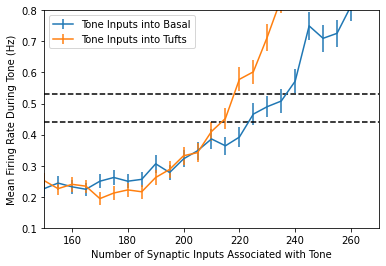

In [75]:
xs = np.arange(150,300,5)
plt.errorbar(xs,basal,bv,label='Tone Inputs into Basal')
              
plt.errorbar(xs,tuft,tv,label='Tone Inputs into Tufts')
plt.plot([150,300],[0.44,0.44],'k--')
plt.plot([150,300],[0.53,0.53],'k--')
plt.legend()
plt.ylabel('Mean Firing Rate During Tone (Hz)')
plt.xlabel('Number of Synaptic Inputs Associated with Tone')
plt.xlim([150,270])
plt.ylim([0.1,.8])
#plt.savefig('synapses_into_tuft_and_basal_AP_outpu_simt.pdf')
